In [33]:
# importing libraries

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
np.random.seed(0)

In [35]:
X, y = make_blobs(n_samples = 5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

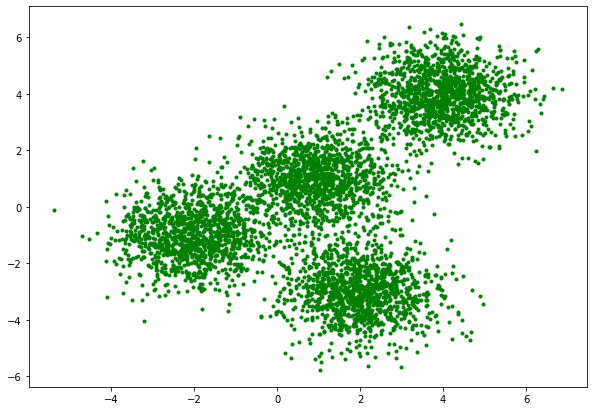

In [36]:
plt.figure(figsize = (10, 7));
plt.scatter(X[:, 0], X[:, 1], marker='.', color='green');
plt.show();

### Setting Up K Means

In [37]:
km = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [38]:
km.fit(X)

KMeans(n_clusters=4, n_init=12)

In [39]:
km_labels = km.labels_
km_labels

array([0, 2, 2, ..., 1, 0, 0])

In [40]:
km_cluster_centers = km.cluster_centers_
km_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

### Creating Visual Plot

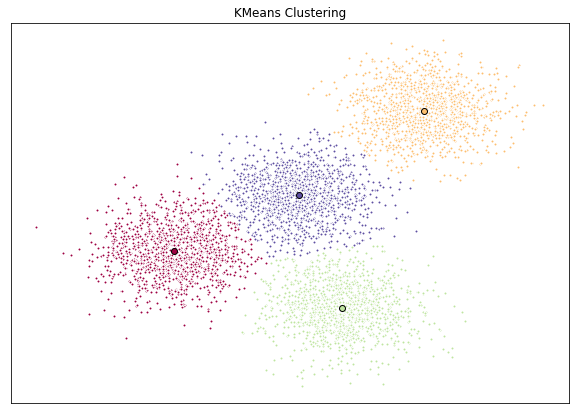

In [41]:
fig = plt.figure(figsize = (10, 7))

# creating array of color based on labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(km_labels))))

# creating plot
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    # list of datapoints
    members = (km_labels == k)
    
    # defining centroid
    clusterCenters = km_cluster_centers[k]
    
    # plotting datapoints with color
    ax.plot(X[members, 0], X[members, 1], 'w', markerfacecolor = col, marker = '.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(clusterCenters[0], clusterCenters[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

### Creating 3 cluster in above Dataset

In [42]:
km_3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [43]:
km_3.fit(X)

KMeans(n_clusters=3, n_init=12)

In [44]:
km_3_labels = km_3.labels_
km_3_labels

array([2, 0, 0, ..., 1, 2, 2])

In [45]:
km_3_cluster_centers = km_3.cluster_centers_
km_3_cluster_centers

array([[ 2.01695379, -2.9407743 ],
       [ 3.70503248,  3.70030577],
       [-0.80734076, -0.16767479]])

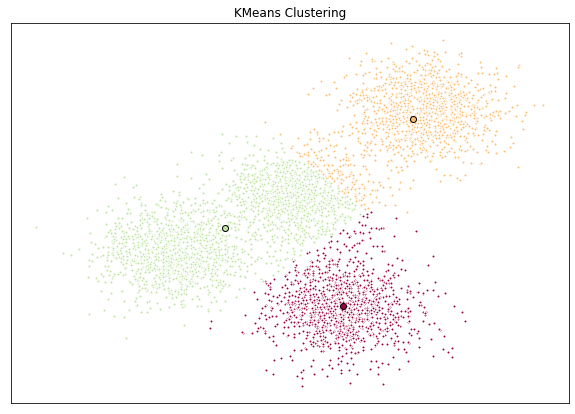

In [49]:
fig = plt.figure(figsize = (10, 7))

# creating array of color based on labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(km_labels))))

# creating plot
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [1, 1]])), colors):
    
    # list of datapoints
    members = (km_3_labels == k)
    
    # defining centroid
    clusterCenters = km_3_cluster_centers[k]
    
    # plotting datapoints with color
    ax.plot(X[members, 0], X[members, 1], 'w', markerfacecolor = col, marker = '.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(clusterCenters[0], clusterCenters[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

## Customer Segmentation with K-Means

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('../dataset/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-Processing

In [52]:
df = df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizing over the standard deviation

In [53]:
from sklearn.preprocessing import StandardScaler
A = df.values[:, 1:]
A = np.nan_to_num(A)
Clus_dataSet = StandardScaler().fit_transform(A)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In [55]:
clusterNum = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(A)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

### Insights

In [56]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [57]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


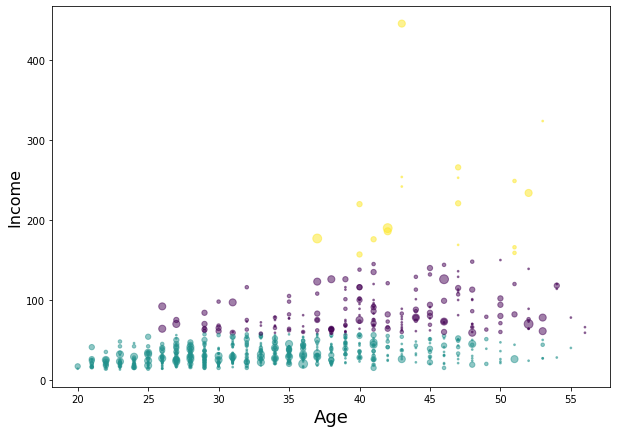

In [58]:
area = np.pi * (A[:, 1]) ** 2
plt.figure(figsize = (10, 7))
plt.scatter(A[:, 0], A[:, 3], s = area, c = labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

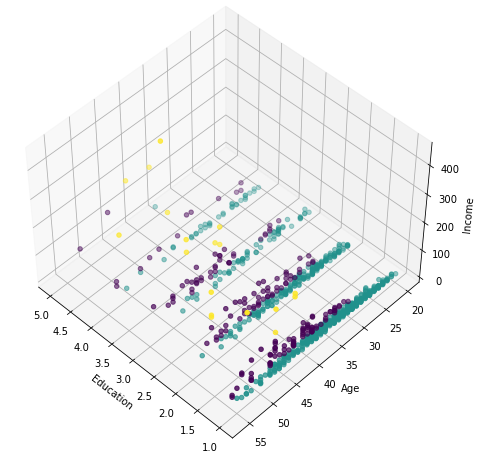

In [62]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(A[:, 1], A[:, 0], A[:, 3], c= labels.astype(np.float))